In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobathon-analytics-vidhya/sample_submission.csv
/kaggle/input/jobathon-analytics-vidhya/train.csv
/kaggle/input/jobathon-analytics-vidhya/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/jobathon-analytics-vidhya/train.csv")
test=pd.read_csv("/kaggle/input/jobathon-analytics-vidhya/test.csv")
s=pd.read_csv("/kaggle/input/jobathon-analytics-vidhya/sample_submission.csv")

In [3]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [4]:
train[train['Health Indicator'].isnull()==True]


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1
12,13,C7,3453,Owned,Individual,66,66,No,NaN,1.0,2.0,20,17192.0,1
19,20,C20,973,Owned,Individual,27,27,No,NaN,NaN,NaN,4,8050.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,50860,C1,217,Owned,Individual,70,70,No,NaN,6.0,3.0,20,19448.0,0
50865,50866,C21,4915,Owned,Individual,74,74,No,NaN,NaN,NaN,14,19944.0,0
50869,50870,C11,1770,Rented,Individual,45,45,No,NaN,1.0,1.0,20,10944.0,0
50871,50872,C10,224,Rented,Individual,21,21,No,NaN,1.0,1.0,13,11840.0,0


In [5]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
train[train['Response']==1].describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,12209.000000,12209,12209.000000,12209,12209,12209.000000,12209.000000,12209,9471,7370,7370.000000,12209.000000,12209.000000,12209.0
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,14+,NaN,NaN,NaN,NaN
freq,NaN,2208,NaN,6763,9640,NaN,NaN,10157,3176,1087,NaN,NaN,NaN,NaN
mean,25576.361209,NaN,1735.629372,NaN,NaN,44.941682,42.674175,NaN,NaN,NaN,2.456174,16.405275,14277.115734,1.0
std,14684.581176,NaN,1425.534461,NaN,NaN,17.148054,17.206959,NaN,NaN,NaN,1.025813,5.222653,6606.163683,0.0
min,3.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2408.000000,1.0
25%,12825.000000,NaN,522.000000,NaN,NaN,29.000000,27.000000,NaN,NaN,NaN,1.000000,14.000000,9282.000000,1.0
50%,25742.000000,NaN,1396.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,3.000000,18.000000,13280.000000,1.0
75%,38331.000000,NaN,2671.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,21.000000,18210.000000,1.0


In [7]:
train[train['Response']==0].describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,38673.000000,38673,38673.000000,38673,38673,38673.000000,38673.000000,38673,29720,23261,23261.000000,38673.000000,38673.000000,38673.0
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,1.0,NaN,NaN,NaN,NaN
freq,NaN,6765,NaN,21188,30896,NaN,NaN,32303,9834,3502,NaN,NaN,NaN,NaN
mean,25398.924547,NaN,1731.891914,NaN,NaN,44.829312,42.759289,NaN,NaN,NaN,2.433859,14.707910,14154.537827,0.0
std,14689.686126,NaN,1423.639961,NaN,NaN,17.361301,17.354885,NaN,NaN,NaN,1.025921,6.602637,6584.799295,0.0
min,1.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2280.000000,0.0
25%,12686.000000,NaN,523.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,11.000000,9226.000000,0.0
50%,25367.000000,NaN,1391.000000,NaN,NaN,44.000000,41.000000,NaN,NaN,NaN,3.000000,17.000000,13140.000000,0.0
75%,38100.000000,NaN,2666.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18086.400000,0.0


In [8]:
test.describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805,21805.000000,21805,21805,21805.000000,21805.000000,21805,16778,13202,13202.000000,21805.000000,21805.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,14+,NaN,NaN,NaN
freq,NaN,3789,NaN,12090,17341,NaN,NaN,18227,5614,1892,NaN,NaN,NaN
mean,61785.000000,NaN,1748.737491,NaN,NaN,44.877734,42.748085,NaN,NaN,NaN,2.440085,15.138363,14220.306581
std,6294.705646,NaN,1438.358949,NaN,NaN,17.254898,17.269112,NaN,NaN,NaN,1.037627,6.302805,6497.996164
min,50883.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2152.000000
25%,56334.000000,NaN,535.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,12.000000,9285.000000
50%,61785.000000,NaN,1392.000000,NaN,NaN,44.000000,41.000000,NaN,NaN,NaN,3.000000,17.000000,13244.000000
75%,67236.000000,NaN,2712.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18201.600000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Upper_Age', ylabel='Reco_Policy_Premium'>

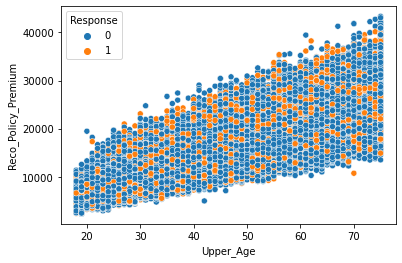

In [9]:
import seaborn as sns
sns.scatterplot(train['Upper_Age'],train['Reco_Policy_Premium'],hue=train['Response'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Lower_Age', ylabel='Reco_Policy_Premium'>

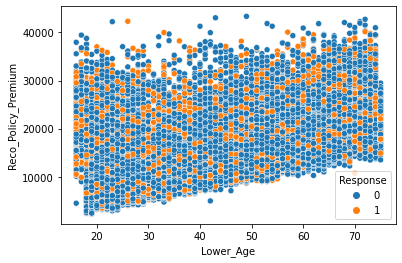

In [10]:
sns.scatterplot(train['Lower_Age'],train['Reco_Policy_Premium'],hue=train['Response'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Upper_Age', ylabel='Reco_Policy_Premium'>

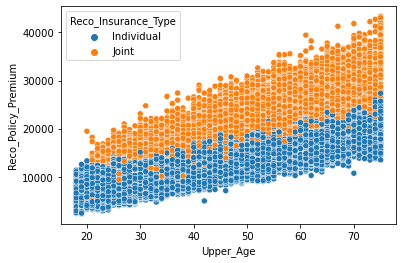

In [11]:
sns.scatterplot(train['Upper_Age'],train['Reco_Policy_Premium'],hue=train['Reco_Insurance_Type'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Lower_Age', ylabel='Reco_Policy_Premium'>

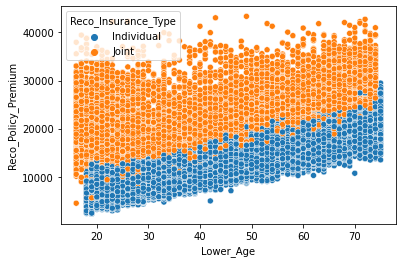

In [12]:
sns.scatterplot(train['Lower_Age'],train['Reco_Policy_Premium'],hue=train['Reco_Insurance_Type'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Upper_Age', ylabel='Reco_Policy_Premium'>

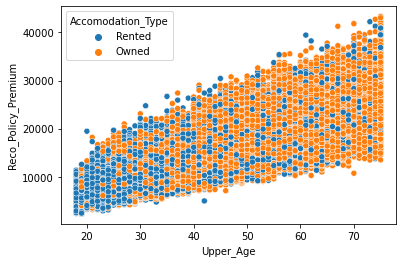

In [13]:
sns.scatterplot(train['Upper_Age'],train['Reco_Policy_Premium'],hue=train['Accomodation_Type'])

In [14]:
train.groupby(['Reco_Insurance_Type'])['Response'].mean()

Reco_Insurance_Type
Individual    0.237813
Joint         0.248309
Name: Response, dtype: float64

In [15]:
df=train.append(test,ignore_index=True)
df

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0,NaN
72683,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0,NaN
72684,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0,NaN
72685,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0,NaN


In [16]:
df[df['Health Indicator'].isnull()==True]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0.0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1.0
12,13,C7,3453,Owned,Individual,66,66,No,NaN,1.0,2.0,20,17192.0,1.0
19,20,C20,973,Owned,Individual,27,27,No,NaN,NaN,NaN,4,8050.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72653,72654,C3,409,Owned,Joint,60,59,Yes,NaN,14.0,2.0,21,28308.0,NaN
72654,72655,C1,24,Owned,Individual,27,27,No,NaN,7.0,2.0,7,6010.0,NaN
72658,72659,C1,1848,Owned,Individual,68,68,No,NaN,8.0,3.0,16,14716.0,NaN
72665,72666,C24,3515,Owned,Individual,60,60,No,NaN,NaN,NaN,15,19488.0,NaN


In [17]:
# df.groupby('Reco_Policy_Cat')['Health Indicator'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )

In [18]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
dtype: int64

In [19]:
df['Holding_Policy_Duration'].value_counts()


1.0     6390
14+     6227
2.0     6032
3.0     5192
4.0     3976
5.0     3354
6.0     2797
7.0     2309
8.0     1885
9.0     1607
10.0    1146
11.0     800
13.0     732
12.0     709
14.0     677
Name: Holding_Policy_Duration, dtype: int64

In [20]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [21]:
# df = impute_categorical(df,'Region_Code','Health Indicator')
# df.groupby('Health Indicator')['Holding_Policy_Duration'].isnull().sum()

In [22]:
df[(df['Health Indicator']=='X1') & (df['Response']==1)]

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
43,44,C24,2748,Owned,Individual,67,67,No,X1,14.0,2.0,17,19936.0,1.0
64,65,C25,2200,Rented,Individual,20,20,No,X1,NaN,NaN,21,6850.0,1.0
68,69,C2,4068,Owned,Individual,23,23,No,X1,NaN,NaN,3,11536.0,1.0
71,72,C3,2476,Rented,Individual,27,27,No,X1,NaN,NaN,21,11556.0,1.0
77,78,C1,1321,Owned,Individual,31,31,No,X1,NaN,NaN,19,10032.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50624,50625,C13,2545,Rented,Individual,20,20,No,X1,NaN,NaN,12,5630.0,1.0
50629,50630,C9,1975,Owned,Individual,22,22,No,X1,NaN,NaN,20,6520.0,1.0
50676,50677,C13,176,Rented,Individual,23,23,No,X1,NaN,NaN,17,7584.0,1.0
50692,50693,C5,1784,Rented,Joint,27,26,Yes,X1,5.0,2.0,20,19440.0,1.0


In [23]:



# df['Health Indicator']=df.groupby('age')['Health Indicator'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )

df['Health Indicator']=df['Health Indicator'].fillna('X10')
df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna('0.0')
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].fillna('0.0')




df['age_dist']=(df['Upper_Age']-df['Lower_Age'])/df['Lower_Age']
df['age']=(df['Upper_Age']+df['Lower_Age'])/2

# df['Health Indicator']=df.groupby('age')['Health Indicator'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )

# df['Holding_Policy_Type']=df.groupby('age')['Holding_Policy_Type'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )

# df['Holding_Policy_Duration']=df.groupby('age')['Holding_Policy_Duration'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )





# df['Health Indicator']=df.groupby('Reco_Policy_Cat')['Health Indicator'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )
# df['Holding_Policy_Type']=df.groupby(['Health Indicator'])['Holding_Policy_Type'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )
# df['Holding_Policy_Duration']=df.groupby(['Reco_Policy_Cat','Health Indicator'])['Holding_Policy_Duration'].transform(
#     lambda grp: grp.fillna(grp.mode().iloc[0])
# )
dum=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Holding_Policy_Type']


    

In [24]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Upper_Age':['mean','max'],
    'Lower_Age':['mean','min'],
    'Health Indicator':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    
}

df1 = df.groupby(['Reco_Policy_Cat']).agg(agg_data)

df1.columns=['A_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on='Reco_Policy_Cat',how='left')

In [25]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Upper_Age':['mean','max'],
    'Lower_Age':['mean','min'],
    'Health Indicator':['size','nunique'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    
}

df1 = df.groupby(['Region_Code','Reco_Policy_Cat']).agg(agg_data)

df1.columns=['B_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Region_Code','Reco_Policy_Cat'],how='left')

In [26]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean','skew'],
    'age_dist':['sum','max','min','mean'],
    'Upper_Age':['mean','max'],
    'City_Code':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Lower_Age':['mean','min'],
}

df1 = df.groupby(['Reco_Policy_Cat','Holding_Policy_Duration','Health Indicator','Holding_Policy_Type']).agg(agg_data)

df1.columns=['C_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Reco_Policy_Cat','Holding_Policy_Duration','Health Indicator','Holding_Policy_Type'],how='left')

In [27]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Upper_Age':['mean','max'],
    'Lower_Age':['mean','min'],
    'Health Indicator':['size','nunique'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    
}

df1 = df.groupby(['Region_Code','Reco_Policy_Cat','Reco_Insurance_Type']).agg(agg_data)

df1.columns=['D_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Region_Code','Reco_Policy_Cat','Reco_Insurance_Type'],how='left')

In [28]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,...,D_Upper_Age_mean,D_Upper_Age_max,D_Lower_Age_mean,D_Lower_Age_min,D_Health Indicator_size,D_Health Indicator_nunique,D_Holding_Policy_Duration_size,D_Holding_Policy_Duration_nunique,D_City_Code_size,D_City_Code_nunique
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,...,36.000000,36,36.000000,36,1,1,1,1,1,1
1,2,C5,1117,Owned,Joint,75,22,No,X2,0.0,...,50.000000,75,35.000000,19,9,5,9,4,9,1
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,...,32.500000,33,32.500000,32,2,2,2,2,2,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,...,52.000000,52,48.000000,48,1,1,1,1,1,1
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,...,51.333333,75,51.333333,28,6,4,6,5,6,1


In [29]:

df['F1'] = (df['Health Indicator'].astype(str)+' '+df['Holding_Policy_Duration'].astype(str)).astype('category')
df['F2'] = (df['Health Indicator'].astype(str)+' '+df['Holding_Policy_Type'].astype(str)).astype('category')
df['F3'] = (df['Health Indicator'].astype(str)+' '+df['Reco_Policy_Cat'].astype(str)).astype('category')
df['F4'] = (df['Health Indicator'].astype(str)+' '+df['Region_Code'].astype(str)).astype('category')

df['F5'] = (df['Holding_Policy_Duration'].astype(str)+' '+df['Holding_Policy_Type'].astype(str)).astype('category')
df['F6'] = (df['Holding_Policy_Duration'].astype(str)+' '+df['Reco_Policy_Cat'].astype(str)).astype('category')
df['F7'] = (df['Holding_Policy_Duration'].astype(str)+' '+df['Region_Code'].astype(str)).astype('category')


df['F8'] = (df['Holding_Policy_Type'].astype(str)+' '+df['Reco_Policy_Cat'].astype(str)).astype('category')
df['F9'] = (df['Holding_Policy_Type'].astype(str)+' '+df['Region_Code'].astype(str)).astype('category')


df['F10'] = (df['Region_Code'].astype(str)+' '+df['Reco_Policy_Cat'].astype(str)).astype('category')



df=pd.get_dummies(df,columns=dum,drop_first=True)
cat=['City_Code','Region_Code','Health Indicator','Holding_Policy_Duration','Reco_Policy_Cat']
for k in cat:
    df[k]=df[k].astype('category')

In [30]:
# agg_data={
#     'Reco_Policy_Premium':['sum','max','min','mean'],
#     'age_dist':['sum','max','min','mean'],
#     'Upper_Age':['mean','max'],
#     'Lower_Age':['mean','min'],
#     'City_Code':['size','nunique'],
#     'Holding_Policy_Duration':['size','nunique'],
#     'Region_Code':['size','nunique'],
#     'Health Indicator':['size','nunique']
    
# }

# df1 = df.groupby(['Reco_Policy_Cat','Holding_Policy_Type']).agg(agg_data)

# df1.columns=['C_' + '_'.join(col).strip() for col in df1.columns.values]
# df1.reset_index(inplace=True)
# df1.head()
# df=df.merge(df1,on=['Reco_Policy_Cat','Holding_Policy_Type'],how='left')

In [31]:
to_drop=[]
corr_matrix = df.drop(['ID','Response'],axis=1).corr()
# print(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper   

to_drop = [column for column in upper.columns if any(upper[column] > 0.93)]
print(to_drop)



['age', 'A_age_dist_sum', 'A_Lower_Age_mean', 'A_Health Indicator_size', 'A_Region_Code_size', 'A_Region_Code_nunique', 'A_Holding_Policy_Duration_size', 'A_City_Code_size', 'B_Health Indicator_size', 'B_Holding_Policy_Duration_size', 'B_City_Code_size', 'C_age_dist_sum', 'C_City_Code_size', 'C_Region_Code_size', 'C_Region_Code_nunique', 'C_Lower_Age_mean', 'D_Reco_Policy_Premium_sum', 'D_Health Indicator_size', 'D_Holding_Policy_Duration_size', 'D_City_Code_size']


In [32]:
df.drop(to_drop,inplace=True,axis=1)

In [33]:
# df['Region_Code']=df['Region_Code'].astype('int')

In [34]:
dftrain=df[df['Response'].isnull()!=True]
dftest=df[df['Response'].isnull()==True]
dftest.head()

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,F8,F9,F10,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0,Holding_Policy_Type_0.0
50882,50883,C1,156,30,30,X10,6.0,5,11934.0,NaN,...,3.0 5,3.0 156,156 5,0,0,0,0,1,0,0
50883,50884,C4,7,69,68,X1,3.0,18,32204.8,NaN,...,3.0 18,3.0 7,7 18,0,1,1,0,1,0,0
50884,50885,C1,564,28,28,X3,2.0,17,9240.0,NaN,...,4.0 17,4.0 564,564 17,1,0,0,0,0,1,0
50885,50886,C3,1177,23,23,X3,3.0,18,9086.0,NaN,...,3.0 18,3.0 1177,1177 18,1,0,0,0,1,0,0
50886,50887,C1,951,75,75,X3,0.0,5,22534.0,NaN,...,0.0 5,0.0 951,951 5,0,0,0,0,0,0,1


In [35]:
X,y=dftrain.drop(['ID','Response'],axis=1),dftrain['Response']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994,stratify=y)

In [36]:
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.metrics import f1_score
def evaluate_exRmse_lgb(truth, predictions):  
    ex = np.exp(-np.sqrt(mean_squared_error(truth,predictions)))
    return ('EXRMSE', ex, True) 



m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4,min_split_gain=0.2,min_child_samples=2,bagging_fraction=0.9,max_depth=-1, )
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_val, y_val)],eval_metric='AUC', early_stopping_rounds=200,verbose=200)
p=m.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.780023	valid_0's binary_logloss: 0.461582
Early stopping, best iteration is:
[69]	valid_0's auc: 0.784132	valid_0's binary_logloss: 0.453409
0.7841324376847437


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


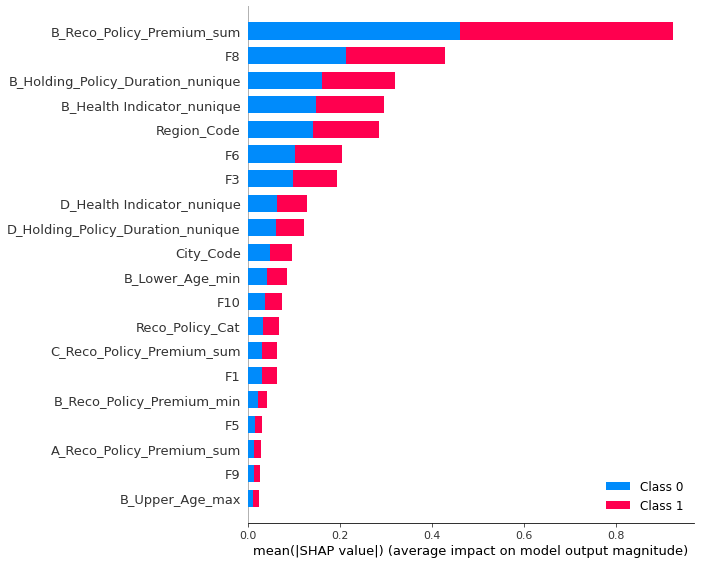

In [37]:
import shap
shap.initjs()

shap_values = shap.TreeExplainer(m.booster_).shap_values(X_train)

shap.summary_plot(shap_values, X_train)

In [38]:
shap_sum = np.abs(shap_values).mean(axis=0).mean(axis=0)
importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
22,B_Reco_Policy_Premium_sum,0.461815
70,F8,0.214098
35,B_Holding_Policy_Duration_nunique,0.160215
34,B_Health Indicator_nunique,0.148217
1,Region_Code,0.142019
...,...,...
36,B_City_Code_nunique,0.000000
62,D_City_Code_nunique,0.000000
43,C_age_dist_min,0.000000
52,D_age_dist_sum,0.000000


In [39]:
feat_cols1= importance_df['column_name'].values[:70]

In [40]:
X,y=dftrain.drop(['ID','Response'],axis=1),dftrain['Response']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X[feat_cols1],y,test_size=0.25,random_state = 1994,stratify=y)



m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4,min_split_gain=0.2,min_child_samples=2,bagging_fraction=0.9,max_depth=-1, )
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_val, y_val)],eval_metric='AUC', early_stopping_rounds=200,verbose=200)
p=m.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


Training until validation scores don't improve for 200 rounds
[200]	valid_0's auc: 0.779937	valid_0's binary_logloss: 0.46192
Early stopping, best iteration is:
[66]	valid_0's auc: 0.784243	valid_0's binary_logloss: 0.453321
0.7842425028604069


In [41]:
X,y=dftrain.drop(['ID','Response'],axis=1),dftrain['Response']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994,stratify=y)

from catboost import CatBoostRegressor,CatBoostClassifier
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices
m2=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
p=m2.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

0:	test: 0.5000000	test1: 0.5000000	best: 0.5000000 (0)	total: 90.1ms	remaining: 4m 30s
200:	test: 0.8825759	test1: 0.7769377	best: 0.7769377 (200)	total: 24.2s	remaining: 5m 36s
400:	test: 0.9104488	test1: 0.7960465	best: 0.7960465 (400)	total: 49.5s	remaining: 5m 21s
600:	test: 0.9165057	test1: 0.7992419	best: 0.7992419 (600)	total: 1m 17s	remaining: 5m 7s
800:	test: 0.9188341	test1: 0.8007055	best: 0.8007055 (800)	total: 1m 44s	remaining: 4m 45s
1000:	test: 0.9225563	test1: 0.8011379	best: 0.8013153 (988)	total: 2m 11s	remaining: 4m 22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8016294119
bestIteration = 1074

Shrink model to first 1075 iterations.
0.8016294119090247


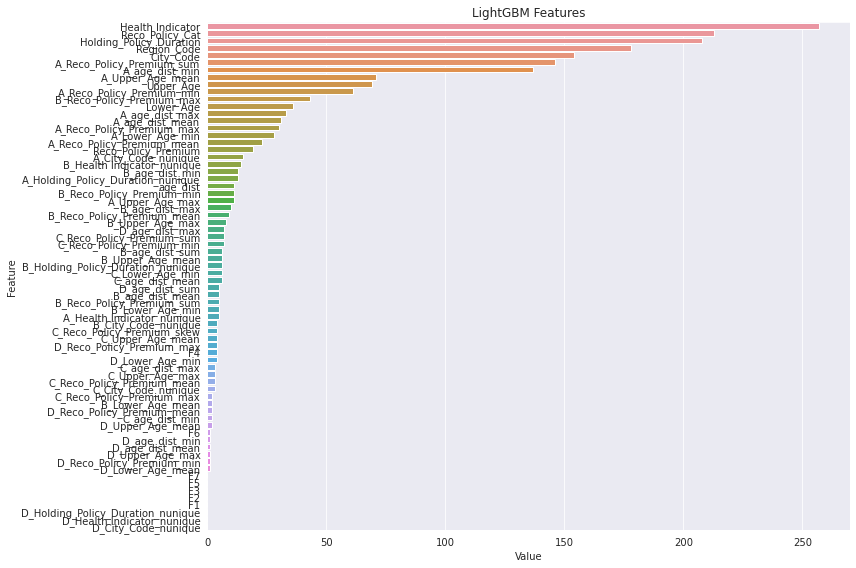

In [42]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(m.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

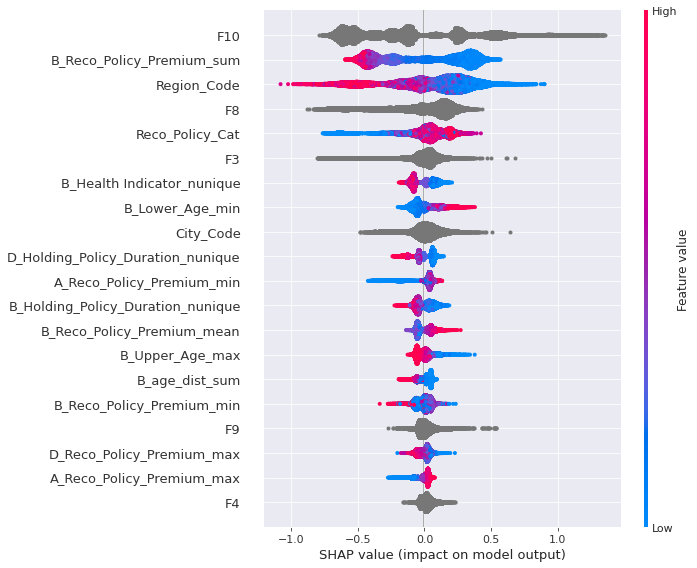

,column_name,shap_importance
72,F10,0.397544
22,B_Reco_Policy_Premium_sum,0.307545
1,Region_Code,0.246939
70,F8,0.181450
6,Reco_Policy_Cat,0.121712
...,...,...
20,A_Holding_Policy_Duration_nunique,0.000000
18,A_Lower_Age_min,0.000000
62,D_City_Code_nunique,0.000000
14,A_age_dist_min,0.000000


In [43]:
# print(feature_imp.shape)
# feat_cols = feature_imp['Feature'][:50].values
# feat_cols

import shap
shap.initjs()

shap_values = shap.TreeExplainer(m2).shap_values(X)

shap.summary_plot(shap_values, X)


shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df




In [44]:
feat_cols= importance_df['column_name'].values[:40]

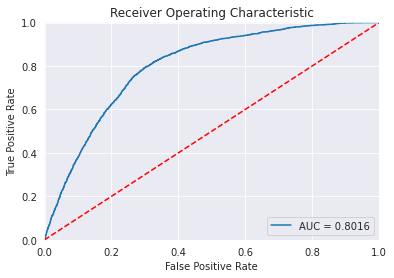

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

fpr, tpr, thresholds = roc_curve(y_val, p)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [46]:
X,y=dftrain.drop(['ID','Response'],axis=1),dftrain['Response']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X[feat_cols],y,test_size=0.25,random_state = 1994,stratify=y)

from catboost import CatBoostRegressor,CatBoostClassifier
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices
m2=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
p=m2.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))


0:	test: 0.5327515	test1: 0.5597897	best: 0.5597897 (0)	total: 129ms	remaining: 6m 28s
200:	test: 0.8911695	test1: 0.7781263	best: 0.7781263 (200)	total: 21.2s	remaining: 4m 55s
400:	test: 0.9124522	test1: 0.7958278	best: 0.7958278 (400)	total: 45.4s	remaining: 4m 54s
600:	test: 0.9168012	test1: 0.7996581	best: 0.7996707 (593)	total: 1m 11s	remaining: 4m 46s
800:	test: 0.9167379	test1: 0.8008445	best: 0.8008456 (795)	total: 1m 38s	remaining: 4m 29s
1000:	test: 0.9138227	test1: 0.8011290	best: 0.8013085 (974)	total: 2m 6s	remaining: 4m 12s
1200:	test: 0.9125198	test1: 0.8017895	best: 0.8018227 (1193)	total: 2m 34s	remaining: 3m 51s
1400:	test: 0.9085620	test1: 0.8022603	best: 0.8022908 (1337)	total: 3m 3s	remaining: 3m 29s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8022949707
bestIteration = 1423

Shrink model to first 1424 iterations.
0.802294970739878


In [47]:
# X,y=dftrain.drop(['ID','Response'],axis=1),dftrain['Response']
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,f1_score

# X=pd.get_dummies(X,columns=['City_Code','Health Indicator','Holding_Policy_Duration','Reco_Policy_Cat'],drop_first=True)
# X['Region_Code']=X['Region_Code'].astype(int)


# X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994,stratify=y)



In [48]:
# from tensorflow.keras import optimizers
# from tensorflow.keras import models,layers
# # from keras.models import Sequential
# # from keras.layers import Activation, Dense, Dropout
# # from keras import optimizers
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
# %matplotlib inline
# sns.set_style("whitegrid")
# np.random.seed(697)



# def create_baseline():
#     # create model
#     model = Sequential()
#     model.add(Dense(10, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#     # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])
#     return model


# # Evaluate model using standardized dataset. 
# estimators = []
# # estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=32, verbose=10)))
# pipeline = Pipeline(estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(pipeline, X, y, cv=kfold)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))




# # #-------------------Build the Neural Network model-------------------
# # print('Building Neural Network model...')
# # adam = optimizers.Adam(lr = 0.005, decay = 0.0000001)

# # model = Sequential()
# # model.add(Dense(100, input_dim=X_train.shape[1],
# #                 kernel_initializer='normal',
# #                 #kernel_regularizer=regularizers.l2(0.02),
# #                 activation="relu"))
# # model.add(Dropout(0.2))
# # model.add(Dense(50,
# #                 #kernel_regularizer=regularizers.l2(0.02),
# #                 activation="tanh"))
# # model.add(Dropout(0.3))
# # model.add(Dense(1))
# # model.add(Activation("sigmoid"))
# # model.compile(loss="binary_crossentropy", optimizer='adam',metrics=['AUC','acc'])

# # history = model.fit(X,y, validation_split=0.25, epochs=10, batch_size=32)

In [49]:
# y_pred_keras = model.predict_proba(X_val).ravel()
# print(y_pred_keras)
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)
# from sklearn.metrics import auc
# auc_keras = auc(fpr_keras, tpr_keras)
# auc_keras

In [50]:
feat_cols,feat_cols1

(array(['F10', 'B_Reco_Policy_Premium_sum', 'Region_Code', 'F8',
        'Reco_Policy_Cat', 'F3', 'B_Health Indicator_nunique',
        'B_Lower_Age_min', 'City_Code',
        'D_Holding_Policy_Duration_nunique', 'A_Reco_Policy_Premium_min',
        'B_Holding_Policy_Duration_nunique', 'B_Reco_Policy_Premium_mean',
        'B_Upper_Age_max', 'B_age_dist_sum', 'B_Reco_Policy_Premium_min',
        'F9', 'D_Reco_Policy_Premium_max', 'A_Reco_Policy_Premium_max',
        'F4', 'F6', 'D_Health Indicator_nunique', 'A_age_dist_max',
        'A_Reco_Policy_Premium_mean', 'F7', 'B_Reco_Policy_Premium_max',
        'B_age_dist_max', 'A_City_Code_nunique',
        'C_Reco_Policy_Premium_sum', 'A_age_dist_mean',
        'C_Reco_Policy_Premium_skew', 'C_Reco_Policy_Premium_mean',
        'A_Reco_Policy_Premium_sum', 'B_age_dist_mean', 'F5', 'F1', 'F2',
        'D_Reco_Policy_Premium_min', 'B_Upper_Age_mean', 'C_age_dist_mean'],
       dtype=object),
 array(['B_Reco_Policy_Premium_sum', 'F8',
       

In [51]:
Xtest=dftest.drop(['ID','Response'],axis=1)
Xtest[feat_cols]

,F10,B_Reco_Policy_Premium_sum,Region_Code,F8,Reco_Policy_Cat,F3,B_Health Indicator_nunique,B_Lower_Age_min,City_Code,D_Holding_Policy_Duration_nunique,...,C_Reco_Policy_Premium_skew,C_Reco_Policy_Premium_mean,A_Reco_Policy_Premium_sum,B_age_dist_mean,F5,F1,F2,D_Reco_Policy_Premium_min,B_Upper_Age_mean,C_age_dist_mean
50882,156 5,459151.0,156,3.0 5,5,X10 5,8,21,C1,8,...,0.257670,14132.833333,23367931.8,0.108582,6.0 3.0,X10 6.0,X10 3.0,5448.0,51.192308,0.004167
50883,7 18,697025.0,7,3.0 18,18,X1 18,7,17,C4,4,...,0.848488,14794.969620,115685000.6,0.032453,3.0 3.0,X1 3.0,X1 3.0,16632.0,43.148148,0.127015
50884,564 17,28348.0,564,4.0 17,17,X3 17,2,28,C1,1,...,0.939818,11667.692308,81086433.8,0.000000,2.0 4.0,X3 2.0,X3 4.0,9240.0,46.500000,0.000000
50885,1177 18,210721.6,1177,3.0 18,18,X3 18,7,22,C3,5,...,0.773437,12812.465116,115685000.6,0.094465,3.0 3.0,X3 3.0,X3 3.0,3870.0,39.312500,0.042843
50886,951 5,289398.4,951,0.0 5,5,X3 5,5,18,C1,8,...,0.808046,13672.150000,23367931.8,0.235432,0.0 0.0,X3 0.0,X3 0.0,6660.0,53.058824,0.075077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,1044 18,211024.0,1044,1.0 18,18,X1 18,6,21,C3,6,...,0.014539,12686.923077,115685000.6,0.059524,4.0 1.0,X1 4.0,X1 1.0,5448.0,38.750000,0.000000
72683,266 18,386219.8,266,3.0 18,18,X5 18,6,21,C4,10,...,0.413221,14511.200000,115685000.6,0.011337,6.0 3.0,X5 6.0,X5 3.0,5960.0,51.000000,0.000000
72684,2470 1,87476.0,2470,0.0 1,1,X3 1,4,37,C12,3,...,1.208678,10981.273418,35731780.2,0.016575,0.0 0.0,X3 0.0,X3 0.0,10206.0,50.600000,0.116099
72685,1676 19,19776.0,1676,1.0 19,19,X4 19,2,25,C10,2,...,1.424964,15671.676923,78266834.2,0.000000,3.0 1.0,X4 3.0,X4 1.0,8208.0,31.500000,0.086868


In [52]:
categorical_features_indices = np.where(X[feat_cols].dtypes =='category')[0]
categorical_features_indices

array([ 0,  2,  3,  4,  5,  8, 16, 19, 20, 24, 34, 35, 36])

In [53]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols],y):
    X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=20)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[feat_cols],ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot.append(p)

0:	test: 0.5633804	test1: 0.5595007	best: 0.5595007 (0)	total: 172ms	remaining: 8m 35s
200:	test: 0.8838419	test1: 0.7889521	best: 0.7889521 (200)	total: 24s	remaining: 5m 34s
400:	test: 0.9068974	test1: 0.8033818	best: 0.8033818 (400)	total: 52.4s	remaining: 5m 39s
600:	test: 0.9025462	test1: 0.8050410	best: 0.8051085 (578)	total: 1m 23s	remaining: 5m 32s
800:	test: 0.8992318	test1: 0.8061356	best: 0.8062726 (786)	total: 1m 54s	remaining: 5m 13s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.80627264
bestIteration = 786

Shrink model to first 787 iterations.
err:  0.8061773581421978
0:	test: 0.5682009	test1: 0.5637929	best: 0.5637929 (0)	total: 169ms	remaining: 8m 26s
200:	test: 0.8962605	test1: 0.7934046	best: 0.7934789 (189)	total: 24.4s	remaining: 5m 39s
400:	test: 0.9104772	test1: 0.8108946	best: 0.8108946 (400)	total: 52.6s	remaining: 5m 41s
600:	test: 0.9108465	test1: 0.8148642	best: 0.8148642 (600)	total: 1m 23s	remaining: 5m 32s
800:	test: 0.9025140	test1

In [54]:
err1=[]
y_pred_tot1=[]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols1],y):
    X_train, X_test = X[feat_cols1].iloc[train_index], X[feat_cols1].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4,min_split_gain=0.2,min_child_samples=2,bagging_fraction=0.9)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='AUC', early_stopping_rounds=50,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err1.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[feat_cols1],num_iteration=m.best_iteration_)[:,-1]
    y_pred_tot1.append(p)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[64]	training's auc: 0.852458	training's binary_logloss: 0.404764	valid_1's auc: 0.785552	valid_1's binary_logloss: 0.452247
err:  0.7855523216174716
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[72]	training's auc: 0.857737	training's binary_logloss: 0.398747	valid_1's auc: 0.79438	valid_1's binary_logloss: 0.445379
err:  0.7943799774203083
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	training's auc: 0.838163	training's binary_logloss: 0.421

In [55]:
# err11=[]
# y_pred_tot11=[]

# from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
# fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=2021)
# for train_index, test_index in fold.split(X[feat_cols],y):
#     X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     m=LGBMClassifier(n_estimators=5000,random_state=2021,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4,min_split_gain=0.2,min_child_samples=2,bagging_fraction=0.9)
#     m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='AUC', early_stopping_rounds=50,verbose=200)
    
#     preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
#     print("err: ",roc_auc_score(y_test,preds))
#     err11.append(roc_auc_score(y_test,preds))
#     p = m.predict_proba(Xtest[feat_cols],num_iteration=m.best_iteration_)[:,-1]
#     y_pred_tot11.append(p)

In [56]:
np.mean(y_pred_tot1,0)


array([0.12332352, 0.16477302, 0.36327854, ..., 0.02694236, 0.57253898,
       0.31007921])

In [57]:
np.mean(err1),np.mean(err)

(0.7883371266736361, 0.8104702582877336)

In [58]:
dftest['Response']=np.mean(y_pred_tot1,0)

dftest[['ID','Response']].to_csv('AV-frk1-job-lgb-sub3.csv',index=False)

In [59]:
dftest['Response']=np.mean(y_pred_tot,0)

dftest[['ID','Response']].to_csv('AV-frk1-job-cb-sub3.csv',index=False)

In [60]:
dftest['Response']=np.mean(y_pred_tot,0)*0.85+np.mean(y_pred_tot1,0)*0.15

dftest[['ID','Response']].to_csv('AV-frk1-job-stack-sub3.csv',index=False)